In [20]:
library("plyr")  
library(dplyr)
library(ggplot2)
library(glue)



List of 2
 $ text       :List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 25
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 10
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

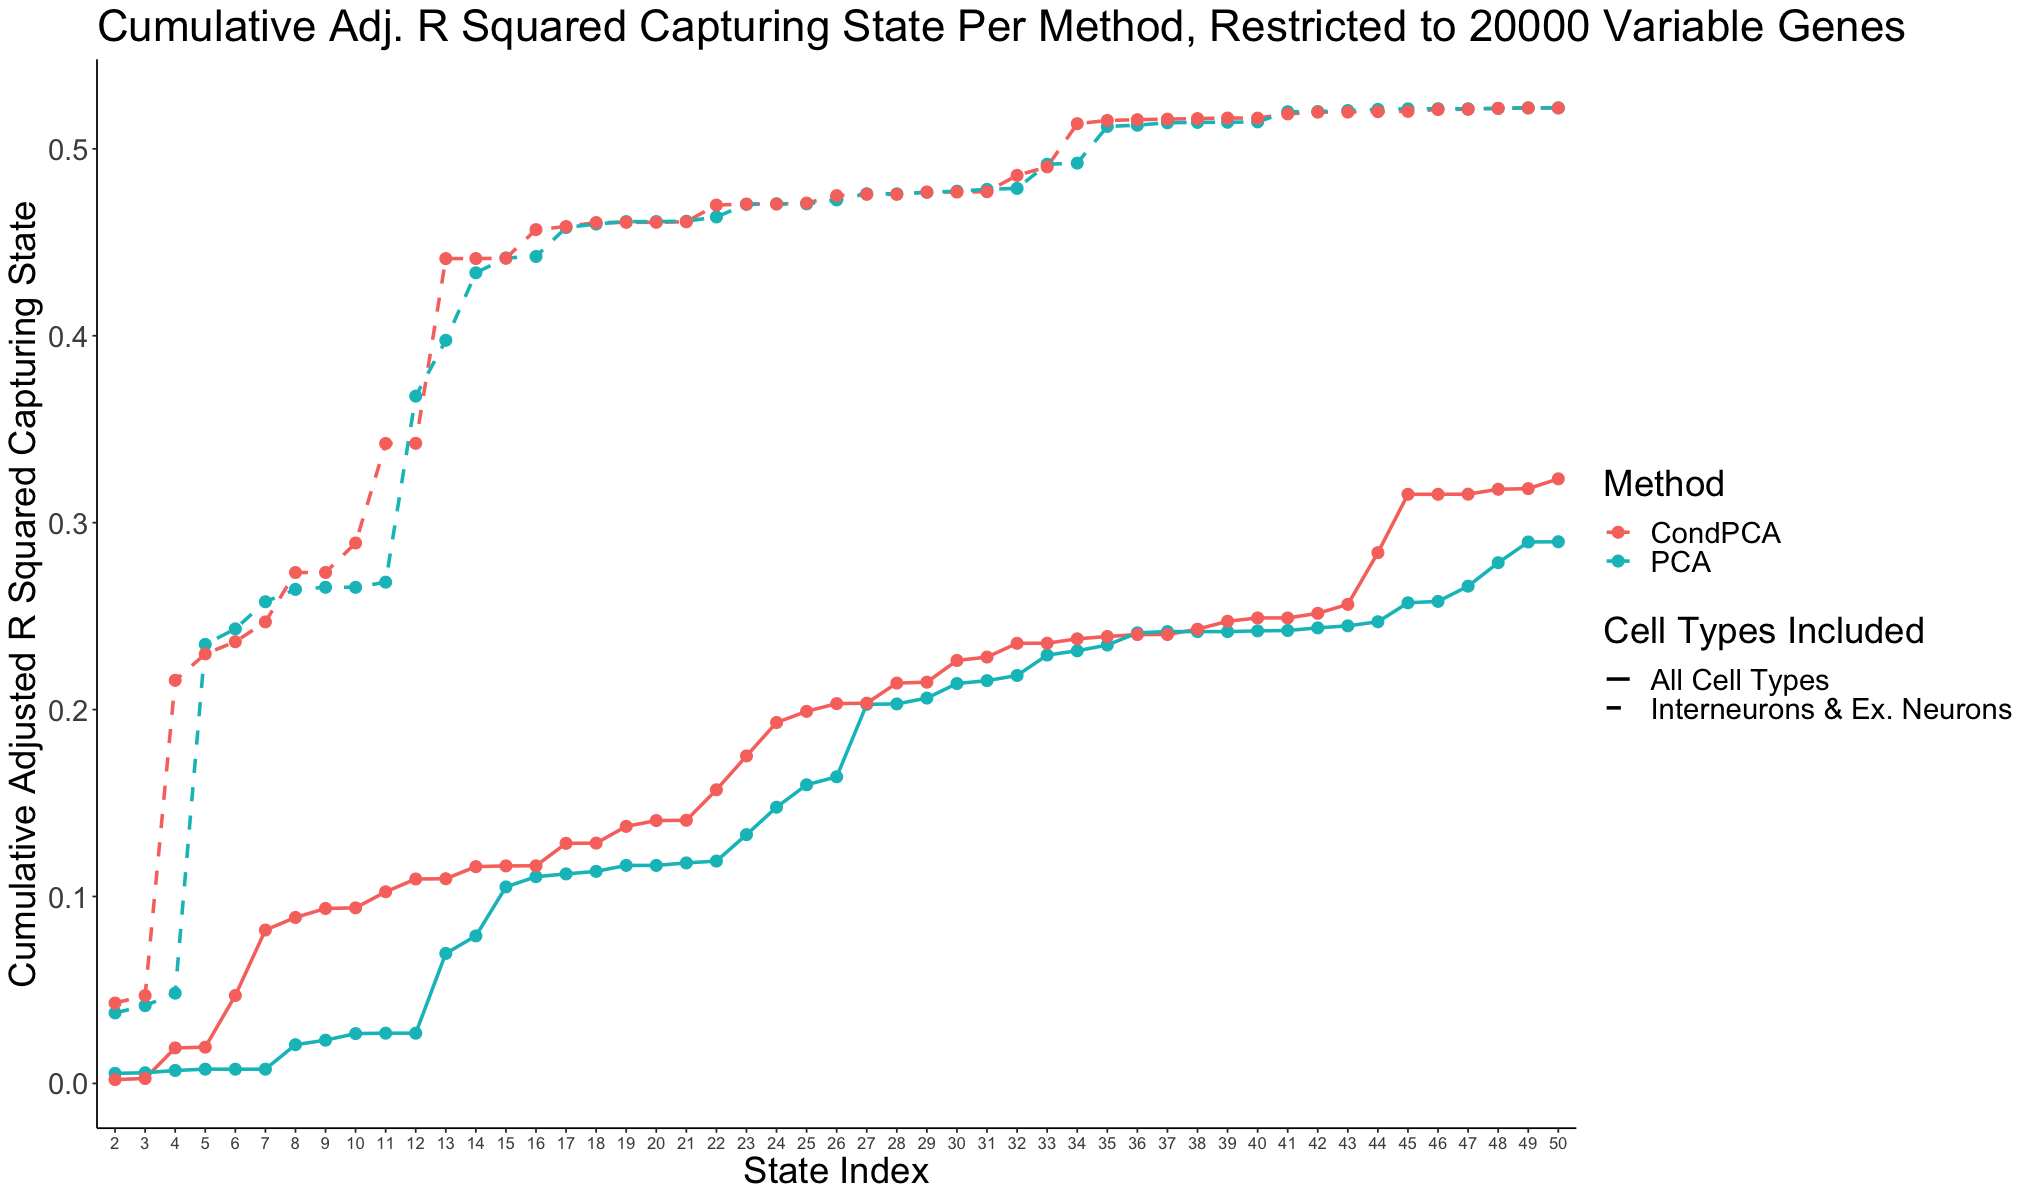

In [60]:
options(repr.plot.width = 17, repr.plot.height = 10)

meta = readRDS("/Users/shayecarver/condPCA/Light_Hvratin/figures/embeddings_examples/meta_QC_GSE102827_MATRIX_20k_vargene.rds")
pca = readRDS("/Users/shayecarver/condPCA/Light_Hvratin/figures/embeddings_examples/PCA_all_cell_types_all_1_50_20000.rds")
pca_int_ex = readRDS("/Users/shayecarver/condPCA/Light_Hvratin/figures/embeddings_examples/PCA_int_ex_all_1_50_20000.rds")

cond_pca_int_ex = readRDS("/Users/shayecarver/condPCA/Light_Hvratin/figures/embeddings_examples/Cond_PCA_int_ex_all_1_50_20000.rds")
cond_pca_all = readRDS("/Users/shayecarver/condPCA/Light_Hvratin/figures/embeddings_examples/Cond_PCA_all_cell_types_all_1_50_20000.rds")

compute_r_sq.adj <- function(title,emb, dim,vargenes,method,ct){
    results = emb[,1:dim]
    sub_meta = meta[match(rownames(results),rownames(meta)),]
    R_sq.adj = summary(lm(scale(sub_meta$time) ~ scale(results) ) )$adj.r.sq
    
    tmp = t(data.frame(c(title, R_sq.adj,dim,vargenes,method,ct)) )
    rownames(tmp) = c()
    colnames(tmp) = c("method", "r.adj","dim","vargenes","Method","CT")
    df = rbind(df, tmp)
    return(df)
}

vargenes = "20000"
df <- data.frame(matrix(ncol = 3, nrow = 0))
x <- c("method", "r.adj","dim","vargenes","Method","CT")

for (dim in 2:50){

    df = compute_r_sq.adj("pca_all",pca,dim,vargenes,"PCA","All Cell Types")
    df = compute_r_sq.adj("pca_int_ex",pca_int_ex,dim,vargenes,"PCA","Interneurons & Ex. Neurons")
    df = compute_r_sq.adj("cond_pca_int_ex",cond_pca_int_ex,dim,vargenes,"CondPCA","Interneurons & Ex. Neurons")
    df = compute_r_sq.adj("cond_pca_all",cond_pca_all,dim,vargenes,"CondPCA","All Cell Types")
    
    
}


df$dim = factor(df$dim, levels=unique(df$dim))

# Set the CT column as a factor for proper linetype mapping
df$CT = factor(df$CT)

# Use ggplot to create the plot with dashed lines based on the CT column
ggplot(df, aes(x=dim, y=as.numeric(r.adj), group=method, colour=Method, linetype=CT)) +
  geom_line(linewidth=1) + geom_point(size = 3) +
  theme_classic() + ggtitle(glue("Cumulative Adj. R Squared Capturing State Per Method, Restricted to {vargenes} Variable Genes") ) +
  scale_linetype_manual(values = c("All Cell Types" = "solid", "Interneurons & Ex. Neurons" = "dashed", "Other CT Levels" = "dotted")) +
  labs(linetype="Cell Types Included", x = "State Index", y = "Cumulative Adjusted R Squared Capturing State")+  # Add axis labels
  theme(text = element_text(size = 22), axis.text.x = element_text(size = 10))
  theme(text = element_text(size = 25), axis.text.x = element_text(size = 10))

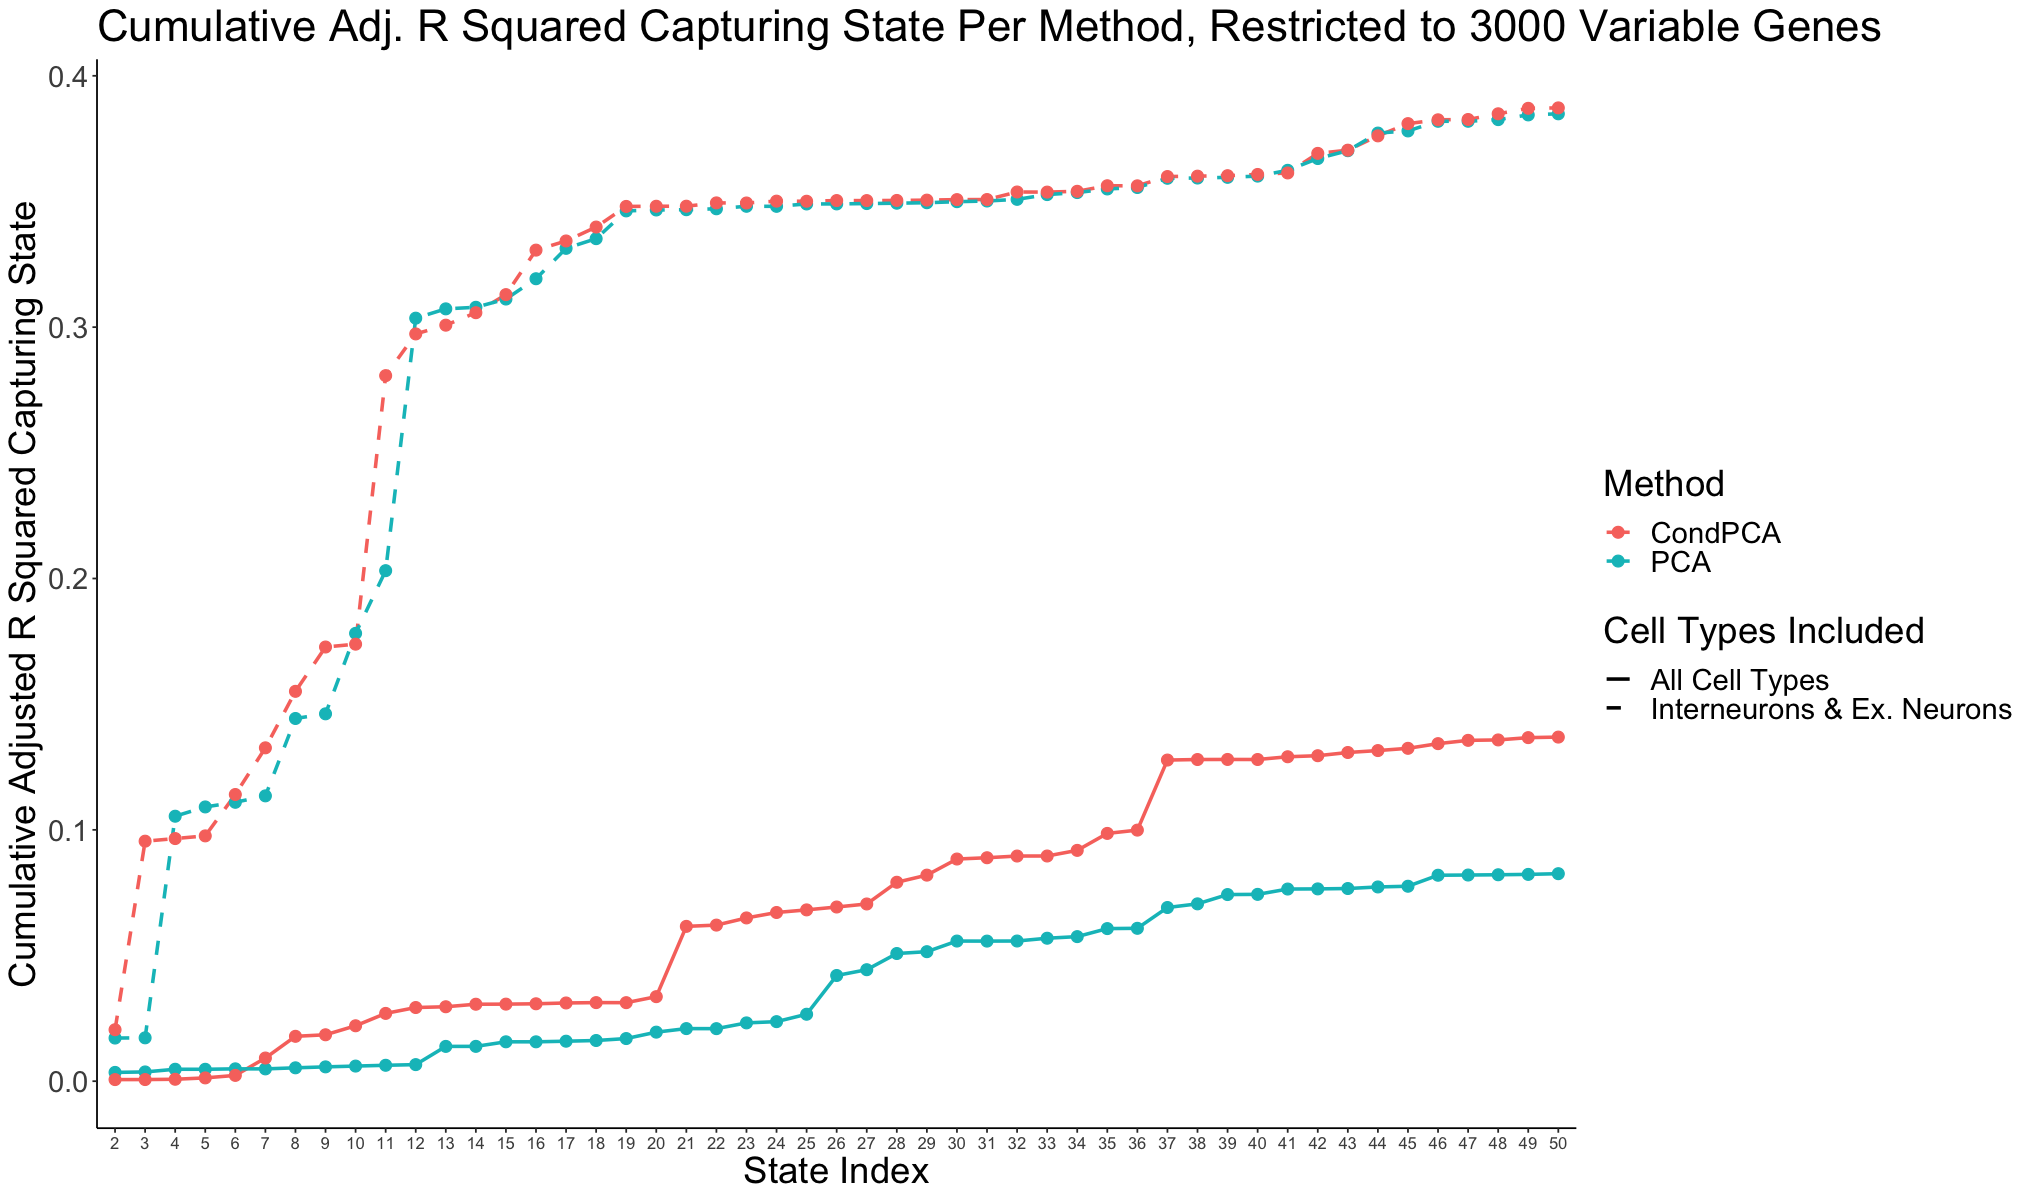

In [58]:
meta = readRDS("/Users/shayecarver/condPCA/Light_Hvratin/figures/embeddings_examples/meta_QC_GSE102827_MATRIX_20k_vargene.rds")
pca = readRDS("/Users/shayecarver/condPCA/Light_Hvratin/figures/embeddings_examples/PCA_all_cell_types_all_1_50_3000.rds")
pca_int_ex = readRDS("/Users/shayecarver/condPCA/Light_Hvratin/figures/embeddings_examples/PCA_int_ex_all_1_50_3000.rds")

cond_pca_int_ex = readRDS("/Users/shayecarver/condPCA/Light_Hvratin/figures/embeddings_examples/Cond_PCA_int_ex_all_1_50_3000.rds")
cond_pca_all = readRDS("/Users/shayecarver/condPCA/Light_Hvratin/figures/embeddings_examples/Cond_PCA_all_cell_types_all_1_50_3000.rds")
vargenes = "3000"
df <- data.frame(matrix(ncol = 3, nrow = 0))
x <- c("method", "r.adj","dim","vargenes","Method","CT")

for (dim in 2:50){

    df = compute_r_sq.adj("pca_all",pca,dim,vargenes,"PCA","All Cell Types")
    df = compute_r_sq.adj("pca_int_ex",pca_int_ex,dim,vargenes,"PCA","Interneurons & Ex. Neurons")
    df = compute_r_sq.adj("cond_pca_int_ex",cond_pca_int_ex,dim,vargenes,"CondPCA","Interneurons & Ex. Neurons")
    df = compute_r_sq.adj("cond_pca_all",cond_pca_all,dim,vargenes,"CondPCA","All Cell Types")
    
    
}


df$dim = factor(df$dim, levels=unique(df$dim))

# Set the CT column as a factor for proper linetype mapping
df$CT = factor(df$CT)

# Use ggplot to create the plot with dashed lines based on the CT column
ggplot(df, aes(x=dim, y=as.numeric(r.adj), group=method, colour=Method, linetype=CT)) +
  geom_line(linewidth=1) + geom_point(size = 3) +
  theme_classic() + ggtitle(glue("Cumulative Adj. R Squared Capturing State Per Method, Restricted to {vargenes} Variable Genes") ) +
  scale_linetype_manual(values = c("All Cell Types" = "solid", "Interneurons & Ex. Neurons" = "dashed", "Other CT Levels" = "dotted")) +
  labs(linetype="Cell Types Included", x = "State Index", y = "Cumulative Adjusted R Squared Capturing State")+  # Add axis labels
  theme(text = element_text(size = 22), axis.text.x = element_text(size = 10))

In [25]:
output = read.table("/Users/shayecarver/condPCA/Light_Hvratin/output.txt", sep=" ", header=TRUE)

output = output %>% distinct()

# replace 19425 with 20k -- some int/ex samples only had 19k variable genes not 20k
output[output$vargenes == 19425,]$vargenes = 20000

head(output)

# rename variables so that the plot labels are better
output[output$method == "Cond_PCA",]$method = "CondPCA"
output[output$method == "scaled_NMF",]$method = "Scaled NMF"
output[output$data_param == "all_cell_types",]$data_param = "All Cell Types"
output[output$data_param == "int_ex",]$data_param = "Interneurons & Ex. Neurons"
colnames(output)[colnames(output) == "method"] <- "Method"

,method,data_param,num_cells,seed,dim,vargenes,adj.rsq,max.rsq
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,UMAP,all_cell_types,15000,2,50,3000,0.002804858,0.002803224
2,UMAP,all_cell_types,1000,1,50,3000,0.002816732,0.002109849
3,UMAP,all_cell_types,10000,2,50,3000,0.002966791,0.003026346
4,UMAP,all_cell_types,10000,3,50,3000,0.003626456,0.003709749
5,UMAP,all_cell_types,5000,4,50,3000,0.004182305,0.003404297
6,UMAP,all_cell_types,1000,2,50,3000,0.002408852,0.001309068


In [49]:
sub = output[output$seed == 1 & output$vargenes == 20000 & !(output$Method %in% c("PCA", "CondPCA")) & output$num_cells == "all",]
sub = sub[c("num_cells","adj.rsq","dim","vargenes","Method","data_param")]
colnames(sub) = colnames(df)
patched_together = rbind(df,sub)


# patched_together$dim = factor(patched_together$dim, levels=unique(patched_together$dim))

# # Set the CT column as a factor for proper linetype mapping
# patched_together$CT = factor(patched_together$CT)

# # Use ggplot to create the plot with dashed lines based on the CT column
# ggplot(patched_together, aes(x=dim, y=as.numeric(r.adj), group=method, colour=Method)) +
#   geom_line(linewidth=1) + geom_point(size = 3) +
#   theme_classic() + ggtitle("Cumulative Adjusted R Squared Capturing State") 
#   # scale_linetype_manual(values = c("All Cell Types" = "solid", "Interneurons & Ex. Neurons" = "dashed", "Other CT Levels" = "dotted")) +
#   # labs(linetype="Cell Type")  # Optional: Rename the linetype legend

